This is a model to predict efficiency of electronic cars. Using data from the EPA to evaluate what kind of important information we might come upon.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
#I am moving the data to a URL so it will make it easier to keep
# it on this document for both of us to use, this data didn't have very many EV cars, I joined them and found only a few so I think
# we should drop this dataset?
#url = "https://raw.githubusercontent.com/JessicaWoods03/data_analysis_work/main/24-testcar-2024-01-29.csv"
# so this has 390 vehicles that are EVs


In [ ]:
# Load data into a DataFrame
#df = pd.read_csv(url)
#print(df.head())

In [ ]:
#df.shape

In [ ]:
#start cleaning up this CSV file
#columns_with_nans = ['Averaging Weighting Factor', 'Averaging Group ID','FE Bag 4', 'ADFE Total Road Load HP', 'ADFE Test Number', 'ADFE N/V Ratio', 'ADFE Equiv. Test Weight (lbs.)', 'PM (g/mi)','FE Bag 3', 'FE Bag 1' ]
#df = df.drop(columns=columns_with_nans)
#count_nan = df.isna().sum()
#with_most_nan = count_nan.sort_values(ascending=False)
#print(with_most_nan)

In [ ]:
#high_nans_but_important = ['FE Bag 2', 'N2O (g/mi)', 'CH4 (g/mi)', 'THC (g/mi)', 'NOx (g/mi)', 'CO (g/mi)',
                       #'CO2 (g/mi)', 'DT-Absolute Speed Change Ratg', 'DT-Inertia Work Ratio Rating',
                       #'DT-Energy Economy Rating', '# of Cylinders and Rotors', 'RND_ADJ_FE']
# because these factors might be important its best to probably replace the nans with a mean value-
#for col in high_nans_but_important:
  #let me check the dtype, I got an error,so might have a string column
  #if col in df.columns:
        #print(f"Column '{col}' has dtype: {df[col].dtype}")
  #else:
       # print(f"Column '{col}' not found in DataFrame")

#modified to all floats for a replace with means

In [ ]:
#for col in high_nans_but_important:
   # if col in df.columns:
   #     mean_value = df[col].mean()
   #     df[col].fillna(mean_value, inplace=True)
   # else:
   #     print(f"Column '{col}' not found in DataFrame")
#count_nan3 = df.isna().sum()
#with_most_nan3 = count_nan3.sort_values(ascending=False)
#print(with_most_nan3)
# additional columns left to drop
#additional_columns_drop = ['Aftertreatment Device Desc', 'Aftertreatment Device Cd', 'Engine Code']
#df = df.drop(columns=additional_columns_drop)

In [ ]:
#Recalls data
columns = [
    "RECORD_ID",
    "CAMPNO",
    "MAKETXT",
    "MODELTXT",
    "YEARTXT",
    "MFGCAMPNO",
    "COMPNAME",
     "MFGNAME",
    "BGMAN",
    "ENDMAN",
    "RCLTYPECD",
    "POTAFF",
    "ODATE",
    "INFLUENCED_BY",
    "MFGTXT",
    "RCDATE",
    "DATEA",
    "RPNO",
    "FMVSS",
    "DESC_DEFECT",
    "CONEQUENCE_DEFECT",
    "CORRECTIVE_ACTION",
    "NOTES",
    "RCL_CMPT_ID",
    "MFR_COMP_NAME",
    "MFR_COMP_DESC",
    "MFR_COMP_PTNO",
    "FIELD23", #need to remove
    "FIELD24", #need to remove
    "FIELD25", #need to remove
    "FIELD26", #need to remove
    "FIELD27", #need to remove
    "FIELD28", #need to remove
    "FIELD29", #need to remove
  ]

REC_url = 'https://static.nhtsa.gov/odi/ffdd/rcl/FLAT_RCL.zip'
Rec = pd.read_csv(REC_url, sep="\t", names=columns)
Rec.head()

<ipython-input-2-f20ceceac3f0>:41: DtypeWarning: Columns (17,18,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  Rec = pd.read_csv(REC_url, sep="\t", names=columns)


,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,MFR_COMP_NAME,MFR_COMP_DESC,MFR_COMP_PTNO,FIELD23,FIELD24,FIELD25,FIELD26,FIELD27,FIELD28,FIELD29
0,1,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,02V237000,HOLIDAY RAMBLER,ENDEAVOR,2000,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,02V237000,HOLIDAY RAMBLER,ENDEAVOR,1999,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Rec.shape

(260829, 34)

In [ ]:
# Lets drop the columns with NA's first because dropping NA's just wipes out the the data completely
columns_to_drop = ['MFR_COMP_NAME', 'MFR_COMP_DESC', 'MFR_COMP_PTNO', 'FIELD23', 'FIELD24', 'FIELD25', 'FIELD26', 'FIELD27', 'FIELD28', 'FIELD29', 'RPNO', 'FMVSS']
Rec = Rec.drop(columns=columns_to_drop)
Rec.head()

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,ODATE,INFLUENCED_BY,MFGTXT,RCDATE,DATEA,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID
0,1,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,20030210.0,ODI,Ford Motor Company,20021106,20021106,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215021000000202
1,2,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:12V/24V/48V BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,20030210.0,ODI,Ford Motor Company,20021106,20021106,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215022000000202
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,20020923.0,MFR,"Jayco, Inc.",20020904,20020912,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015210000106403000000349
3,4,02V237000,HOLIDAY RAMBLER,ENDEAVOR,2000,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,20021105.0,MFR,MONACO COACH CORPORATION,20020909,20020912,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000083965000000272
4,5,02V237000,HOLIDAY RAMBLER,ENDEAVOR,1999,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,20021105.0,MFR,MONACO COACH CORPORATION,20020909,20020912,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000080938000000272


Make and model, find important features that would help with efficiency as far as cleaning data. Review the metadata-

In [ ]:
# I also need to find which other columns have a super huge amount of NANS to drop-
count_nans = Rec.isna().sum()
with_most_nans = count_nans.sort_values(ascending=False)
print(with_most_nans)


BGMAN                145294
ENDMAN               145052
MFGCAMPNO            100498
CONEQUENCE_DEFECT     17631
ODATE                 12502
DESC_DEFECT            8225
CORRECTIVE_ACTION      8137
POTAFF                  286
NOTES                   265
MFGNAME                   5
MFGTXT                    0
DATEA                     0
RCDATE                    0
RECORD_ID                 0
INFLUENCED_BY             0
CAMPNO                    0
RCLTYPECD                 0
COMPNAME                  0
YEARTXT                   0
MODELTXT                  0
MAKETXT                   0
RCL_CMPT_ID               0
dtype: int64


*BGMAN*                143026<br>
ENDMAN               142784<br>
MFGCAMPNO            100382<br>
So these variables will take out half of the txt documents data...with the nans that are located in the columns because the txt file is (258560, 22) in shape. So they must be removed as well. Its pretty wrong to just wipe out nans without analysing the data. As well as look for what columns are relavant to the NN we are builting-

In [ ]:
high_no_nan_columns = ['BGMAN', 'ENDMAN', "MFGCAMPNO"]
Rec = Rec.drop(columns=high_no_nan_columns)
Rec.head()

# rename columns
Rec = Rec.rename(columns={'MAKETXT' : 'Make', 'MODELTXT': 'Model', 'YEARTXT': 'Year'})

This is were we explored the Environmental testing data and found it didn't have that much on EV cars. So it is commented out, but avaible to explore to ensure that we did go over this dataset as a possibility.
<br>
<br>
Results of the data exploration into the first dataset:<br>
Matched records:
(390, 19)
(14, 3)
(94, 54)

In [ ]:
Rec.dtypes

RECORD_ID              int64
CAMPNO                object
Make                  object
Model                 object
Year                   int64
COMPNAME              object
MFGNAME               object
RCLTYPECD             object
POTAFF               float64
ODATE                float64
INFLUENCED_BY         object
MFGTXT                object
RCDATE                 int64
DATEA                  int64
DESC_DEFECT           object
CONEQUENCE_DEFECT     object
CORRECTIVE_ACTION     object
NOTES                 object
RCL_CMPT_ID           object
dtype: object

In [ ]:
# make model and year of the environment dataset
# Merge datasets based on make, model, and year
# checked_data = pd.merge(make_model_year, Rec, on=['Make', 'Model', 'Year'], how='inner')

# print("Matched records:")

# print(checked_data.shape)
# columns_important = ['Make', 'Model', 'Year']
# Get unique combinations of make, model, and year from the merged data
#  = checked_data[['Make', 'Model', 'Year']].drop_duplicates()
# (checked_unique.shape)
# selected_columns_dataset = checked_unique[['Make', 'Model', 'Year']]
# rename columns to clean the dataset
# df = df.rename(columns={
#    'Model Year': 'Year',
#     'Represented Test Veh Make': 'Make',
#     'Represented Test Veh Model': 'Model'
# })

#now merge so all I have is the EV cars from the other dataset
#working threw data descrepancies - I should have 390 vehicles total-

# df = pd.merge(df, checked_unique, on=['Make', 'Model', 'Year'], how='inner')[df.columns]

# print(df.shape)
# checked_unique.head()


<h2>Columns for Rec:</h2>
RECORD_ID: This column could serve as a unique identifier.<br>
Make: The make of the vehicle is important for identifying the manufacturer. Recalls may vary between different manufacturers due to differences in manufacturing processes and quality control measures.<br>
Model: The model of the vehicle provides information about the specific vehicle variant or model line affected by the recall.<br>
Year: The year of the vehicle's manufacture could be important for understanding the age of the vehicle and potential correlations with recall issues.<br>
CAMPNO: This column may contain recall campaign numbers, which are unique identifiers assigned to specific recall campaigns by regulatory agencies or manufacturers.<br>
RCLTYPECD: The recall type code provides information about the type of recall (e.g., safety recall, emissions recall), which could be relevant for analyzing efficiency-related issues.<br>
DESC_DEFECT: This column contains a description of the defect associated with the recall, which is crucial for understanding the nature of the issue and its potential impact on vehicle efficiency.<br>
CONEQUENCE_DEFECT: The consequences of the defect provide insights into the potential safety hazards or performance issues associated with the recall, which may indirectly affect vehicle efficiency.<br>
CORRECTIVE_ACTION: This column describes the corrective action taken by the manufacturer to address the defect, which could include repairs, replacements, or software updates aimed at improving vehicle efficiency.<br>
ODATE (Original Date): This column contains the original date of the recall, which could be useful for analyzing trends and patterns over time.<br>

In [ ]:
#cleaning out columns that are not important from what I researched its only these 10 columns
Rec = Rec.loc[:,['RECORD_ID', 'Make', 'Model', 'Year', 'CAMPNO','RCLTYPECD', 'DESC_DEFECT','CONEQUENCE_DEFECT', 'CORRECTIVE_ACTION','ODATE' ]]
Rec.head()

,RECORD_ID,Make,Model,Year,CAMPNO,RCLTYPECD,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,ODATE
0,1,FORD,FOCUS,2000,02V288000,V,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,20030210.0
1,2,FORD,FOCUS,2001,02V288000,V,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,20030210.0
2,3,JAYCO,FT EAGLE 10 SG,2003,02V236000,V,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,20020923.0
3,4,HOLIDAY RAMBLER,ENDEAVOR,2000,02V237000,V,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,20021105.0
4,5,HOLIDAY RAMBLER,ENDEAVOR,1999,02V237000,V,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,20021105.0


In [ ]:
# ok fix the rest of the nan values
count_nans2 = Rec.isna().sum()
with_most_nans3 = count_nans2.sort_values(ascending=False)
print(with_most_nans3)
# I can't really guess the odate or other values on here so I will have to drop the remaining nan values
Rec.dropna(inplace=True)

CONEQUENCE_DEFECT    17631
ODATE                12502
DESC_DEFECT           8225
CORRECTIVE_ACTION     8137
RECORD_ID                0
Make                     0
Model                    0
Year                     0
CAMPNO                   0
RCLTYPECD                0
dtype: int64


In [ ]:
count_nans4 = Rec.isna().sum()
with_most_nans4 = count_nans4.sort_values(ascending=False)
print(with_most_nans4)

RECORD_ID            0
Make                 0
Model                0
Year                 0
CAMPNO               0
RCLTYPECD            0
DESC_DEFECT          0
CONEQUENCE_DEFECT    0
CORRECTIVE_ACTION    0
ODATE                0
dtype: int64


In [ ]:
# need to isolate which columns are text lets get info for that
Rec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232872 entries, 0 to 260828
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RECORD_ID          232872 non-null  int64  
 1   Make               232872 non-null  object 
 2   Model              232872 non-null  object 
 3   Year               232872 non-null  int64  
 4   CAMPNO             232872 non-null  object 
 5   RCLTYPECD          232872 non-null  object 
 6   DESC_DEFECT        232872 non-null  object 
 7   CONEQUENCE_DEFECT  232872 non-null  object 
 8   CORRECTIVE_ACTION  232872 non-null  object 
 9   ODATE              232872 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 19.5+ MB


We want to find the ideal efficiency reports for each vehicle so we can find what the highest features are needed for efficiency in a correlation matrix,  'Odometer_Reading' column based on a random annual travel distance between 8,060 and 12,980 miles for each vehicle- So I am taking the odate - year and then mathmatically creating a odometer based on the average travelling per year done by electronic vehicles. It is randomly created between the high and lowest travelling average in the US. Then the correlation matrix is built from that. There is nothing wrong with building a target data to apply features too, I did it R programming alot-<br>
Site:<br>
https://www.sciencedirect.com/science/article/abs/pii/S254243512300404X#:~:text=Analyzing%20the%20odometer%20readings%20from,compared%20with%2012%2C979%20for%20SUVs.

In [ ]:
import numpy as np

# Replacing all years above 2024 with 2024
Rec.loc[Rec['Year'] > 2024, 'Year'] = 2024

# Converting 'ODATE' to integer
Rec['ODATE'] = Rec['ODATE'].astype(int)
Rec['ODATE_Month'] = (Rec['ODATE'] % 10000) // 100
Rec['ODATE_Year'] = Rec['ODATE'] // 10000
Rec['num_years'] = Rec['ODATE_Year'] - Rec['Year']

Rec['num_years'] = Rec['num_years'].abs()

# for all the zero values we need to create a percentage of the year it was travelled
# by the month/12 * random integer of max or min annual miles for odometer. We will assume
# January is always a buy time of the vehicle and calculate the month as percentage of the year-
# 42994 vehicles with zero on the year so it won't cause a significant bias in the outcome.

# Calculate percentage of the year traveled for zero values in 'num_years' column
Rec.loc[Rec['num_years'] == 0, 'num_years'] = Rec.loc[Rec['num_years'] == 0, 'ODATE_Month'] / 12

Rec.tail()

,RECORD_ID,Make,Model,Year,CAMPNO,RCLTYPECD,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,ODATE,ODATE_Month,ODATE_Year,num_years
260819,260822,DUTCHMEN,ASPEN TRAIL,2024,24V234000,V,Keystone RV Company (Keystone) is recalling ce...,A circuit board that overheats increases the r...,Dealers can remove the LED backlights or termi...,20240502,5,2024,0.416667
260820,260823,DUTCHMEN,ASPEN TRAIL,2024,24V234000,V,Keystone RV Company (Keystone) is recalling ce...,A circuit board that overheats increases the r...,Dealers can remove the LED backlights or termi...,20240502,5,2024,0.416667
260826,260829,AUTOLIV,DRIVER FRONT AIRBAG,2024,24E009000,E,"General Motors, LLC (GM) is recalling certain ...",An air bag that does not deploy properly in a ...,Dealers will inspect and replace the driver ai...,20240313,3,2024,0.250000
260827,260830,CHRYSLER,VOYAGER,2024,24V240000,V,"Chrysler (FCA US, LLC) is recalling certain 20...",An inactive traction control system can increa...,"Dealers will update the TCS software, free of ...",20240411,4,2024,0.333333
260828,260831,CHRYSLER,PACIFICA,2024,24V240000,V,"Chrysler (FCA US, LLC) is recalling certain 20...",An inactive traction control system can increa...,"Dealers will update the TCS software, free of ...",20240411,4,2024,0.333333


In [ ]:
Rec.shape

(232872, 13)

In [ ]:
Rec.head()

,RECORD_ID,Make,Model,Year,CAMPNO,RCLTYPECD,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,ODATE,ODATE_Month,ODATE_Year,num_years
0,1,FORD,FOCUS,2000,02V288000,V,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,20030210,2,2003,3.0
1,2,FORD,FOCUS,2001,02V288000,V,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,20030210,2,2003,2.0
2,3,JAYCO,FT EAGLE 10 SG,2003,02V236000,V,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,20020923,9,2002,1.0
3,4,HOLIDAY RAMBLER,ENDEAVOR,2000,02V237000,V,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,20021105,11,2002,2.0
4,5,HOLIDAY RAMBLER,ENDEAVOR,1999,02V237000,V,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,20021105,11,2002,3.0


In [ ]:
# check num of years it seemed off when I did range, range should not be 900 years LOL
# Calculate quartiles and IQR
Q1 = Rec['num_years'].quantile(0.25)
Q3 = Rec['num_years'].quantile(0.75)
IQR = Q3 - Q1

# Identifying potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Rec[(Rec['num_years'] < lower_bound) | (Rec['num_years'] > upper_bound)]

print("Potential outliers:")
print(outliers)


Potential outliers:
        RECORD_ID     Make            Model  Year     CAMPNO RCLTYPECD  \
36             37      emc                   2024  02e052000         e   
50             51           wheelchair lift  2024  02e047000         e   
109           110   cooper        p20570r15  2024  02t008000             
138           139    thule         speedway  2024  02e054000         e   
139           140    thule         backpack  2024  02e054000         e   
...           ...      ...              ...   ...        ...       ...   
248623     248626      kia       forte koup  2012  23v652000         v   
249775     249778    altec   digger derrick  2010  23v636000         v   
251246     251249  prevost              vip  2010  24v213000         v   
256138     256141    altec    aerial device  2004  24v015000         v   
259369     259372      kia          sorento  2011  23v877000         v   

                                              DESC_DEFECT  \
36      electronic gas brake s

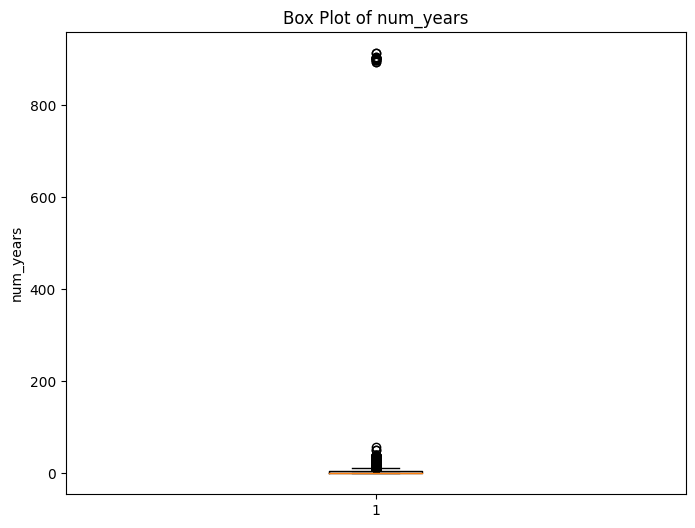

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(Rec['num_years'])
plt.title('Box Plot of num_years')
plt.ylabel('num_years')
plt.show()

In [ ]:
# After reviewing the variables for range write up I have num_years over 900- we need to clean that up
# Drop records where num_years is greater than 20
Rec = Rec[Rec['num_years'] <= 20]

In [ ]:
Rec.shape

(54566, 20)

In [ ]:
# so will try to see how many unique variables are inside the text, so say each text phrase is unique or not
# tokenize the data so I can do a correlation matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokenization: Tokenize the text data into individual words or tokens. You can use libraries like NLTK (Natural Language Toolkit) or spaCy for this purpose.

Remove Stopwords and Punctuation: Remove stopwords (commonly used words like "the", "is", "and", etc.) and punctuation marks from the tokens. These words typically don't contribute much to the uniqueness of a phrase.

Normalization: Normalize the text data by converting all words to lowercase and removing any extra spaces.

Comparison: Compare each text phrase with all other text phrases in the dataset to identify duplicates.<br>

Working to find a corrilation matrix with the text phrases:  We can evaluate the highest features that would effect efficiency. I can see that the text phrases are repeating so we can turn those into a variable that can be measured against the other features.





In [ ]:
# Function to preprocess , I am going to leave this by itself so my partner can just call this function too
# on there text files as well-
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    # normalizing the text
    words = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

This one below takes a long time to process-

In [ ]:
text_columns = ['Make', 'Model', 'DESC_DEFECT','RCLTYPECD','CAMPNO','CONEQUENCE_DEFECT', 'CORRECTIVE_ACTION']
for col in text_columns:
    Rec[col] = Rec[col].apply(preprocess_text)

Rec.drop_duplicates(subset=text_columns, inplace=True)
for col in text_columns:
    Rec[col + '_freq'] = Rec.groupby(col)[col].transform('count')


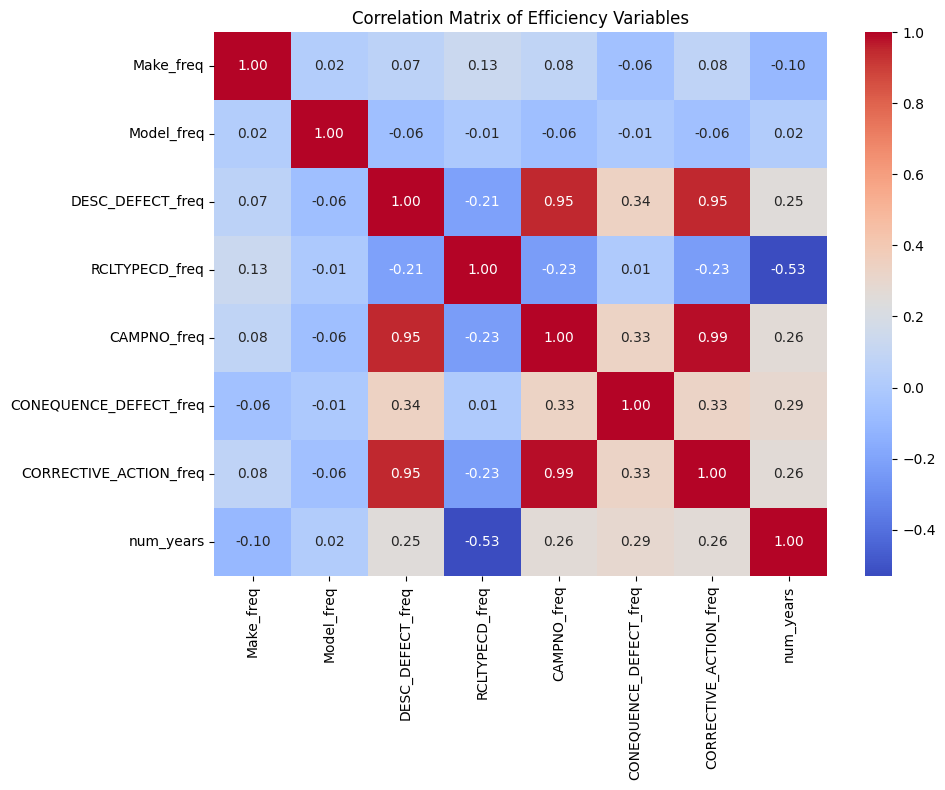

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#changing target variable to num_years
efficiency_corr = Rec[['Make_freq', 'Model_freq', 'DESC_DEFECT_freq','RCLTYPECD_freq','CAMPNO_freq', 'CONEQUENCE_DEFECT_freq', 'CORRECTIVE_ACTION_freq','num_years']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(efficiency_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Efficiency Variables')
plt.tight_layout()
plt.show()

In [ ]:
# getting the ranges of these variables
columns_to_check = ['Make_freq', 'Model_freq', 'DESC_DEFECT_freq', 'RCLTYPECD_freq',
                    'CAMPNO_freq', 'CONEQUENCE_DEFECT_freq', 'CORRECTIVE_ACTION_freq', 'num_years']

# Calculate the range for each column
range_results = {}
for col in columns_to_check:
    max_value = Rec[col].max()
    min_value = Rec[col].min()
    range_results[col] = max_value - min_value

# Convert results to DataFrame for better presentation
range_df = pd.DataFrame.from_dict(range_results, orient='index', columns=['Range'])

print(range_df)

                               Range
Make_freq                2856.000000
Model_freq               1765.000000
DESC_DEFECT_freq          129.000000
RCLTYPECD_freq          49287.000000
CAMPNO_freq               129.000000
CONEQUENCE_DEFECT_freq    531.000000
CORRECTIVE_ACTION_freq    129.000000
num_years                  19.916667


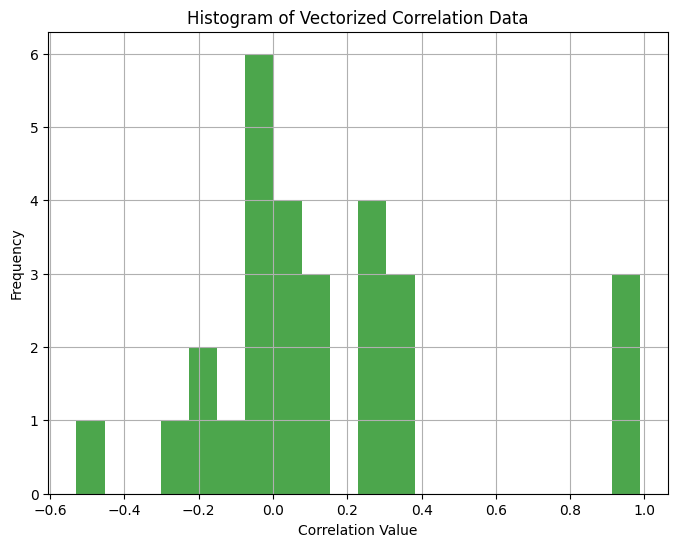

In [ ]:
# Vectorize the correlation matrix
upper_triangle = np.triu(efficiency_corr.values, k=1)
correlation_vector = upper_triangle[upper_triangle != 0]

# Plotting histogram of correlation values
plt.figure(figsize=(8, 6))
plt.hist(correlation_vector, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Vectorized Correlation Data')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

'CAMPNO_freq' and 'DESC_DEFECT_freq'/'Corrective_Action_freq' indicates a strong relationship between recall campaign numbers and descriptions of defects or corrective actions, providing valuable insights into the recall management process and facilitating efficient recall procedures. There seems to be alot of independant variables within the text files outside the recall teams base operations which shows in the heatmap.
This suggests that most of the recalls might be independant of the number of years.

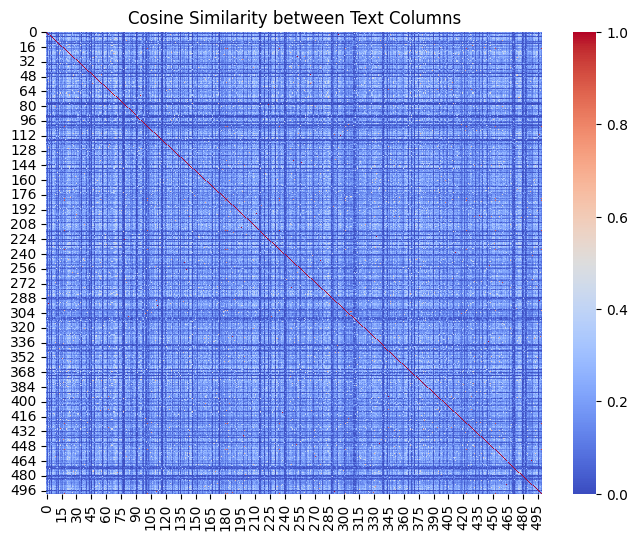

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
sample_size = 500

sampled_data = Rec.sample(n=sample_size, random_state=42)

text_columns = ['DESC_DEFECT','CORRECTIVE_ACTION']

text_data = sampled_data[text_columns].apply(lambda x: ' '.join(x.dropna()), axis=1).tolist()

vectorizer = CountVectorizer(max_features=1000)  # Limiting to 1000 features
X = vectorizer.fit_transform(text_data)

tokens_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

cosine_sim = cosine_similarity(X, X)

cosine_sim_df = pd.DataFrame(cosine_sim)

# Plot heatmap of cosine similarity
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_df,cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity between Text Columns')
plt.show()

This is showing that most entries are distinct

The Mean Squared Error (MSE) of approximately 464.01 indicates that, on average, the squared difference between the actual and predicted values is relatively low, suggesting good predictive performance.<br>
The R-squared (R^2) score of approximately 0.957 indicates that the model explains about 95.7% of the variance in the target variable, which is very high and suggests that the model fits the data well.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
#added the rest of the tolkenized features
features_defect1 = ['Make_freq', 'Model_freq', 'Year','CAMPNO_freq', 'CONEQUENCE_DEFECT_freq', 'CORRECTIVE_ACTION_freq']

# already have odometer as the target variable-
# Some of these not linear and some variables are independant of the target variable
# so knowing that after looking at the corrations between the data, I did this model

# Generate some synthetic data for demonstration
X2, y2 = make_regression(n_samples=1000, n_features=len(features_defect1), noise=0.1, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

meta_model = LinearRegression()

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

stacking_regressor.fit(X_train2, y_train2)

y_pred_stacking = stacking_regressor.predict(X_test2)

mse_stacking = mean_squared_error(y_test2, y_pred_stacking)
r2_stacking = r2_score(y_test2, y_pred_stacking)

print("StackingRegressor:")
print("Mean Squared Error:", mse_stacking)
print("R^2 Score:", r2_stacking)

StackingRegressor:
Mean Squared Error: 464.0098760067529
R^2 Score: 0.9572514968372142


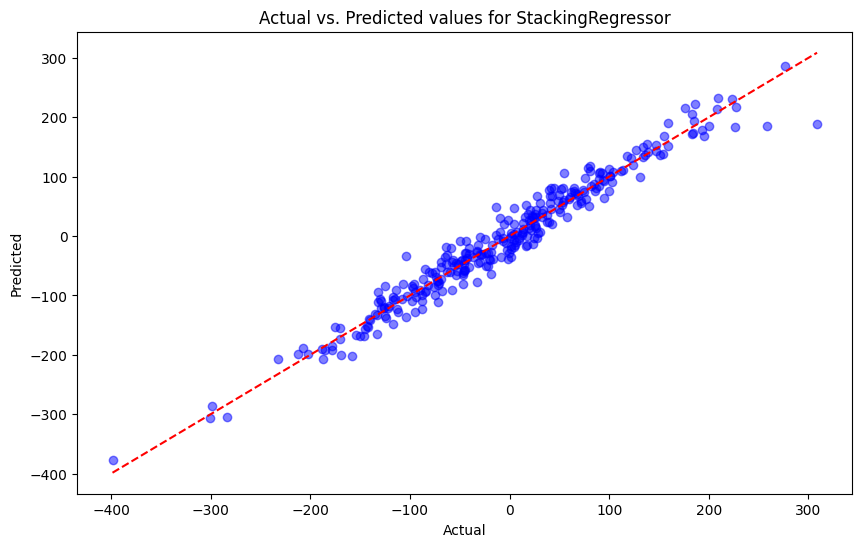

In [ ]:
# visualization of machine learning model
# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values for StackingRegressor')
plt.show()

In [ ]:
print(Rec.head())

   RECORD_ID             Make           Model  Year     CAMPNO RCLTYPECD  \
0          1             ford           focus  2000  02v288000         v   
2          3            jayco  ft eagle 10 sg  2003  02v236000         v   
3          4  holiday rambler        endeavor  2000  02v237000         v   
5          6  holiday rambler      vacationer  2000  02v237000         v   
8          9     monaco coach         lapalma  2000  02v237000         v   

                                         DESC_DEFECT  \
0  certain passenger vehicles equipped zetec engi...   
2  certain folding tent campers federal certifica...   
3  certain class motor homes floor truss network ...   
5  certain class motor homes floor truss network ...   
8  certain class motor homes floor truss network ...   

                                   CONEQUENCE_DEFECT  \
0  turn could cause battery cables short resultin...   
2  tires inflated 80 psi could blow resulting pos...   
3  conditions result bottoming suspens

In [ ]:
#Investigations data
import pandas as pd
columns = [
    "NHTSA ACTION NUMBER",
    "MAKE",
    "MODEL",
    "YEAR",
    "COMPNAME",
    "MFR_NAME",
    "ODATE",
    "CDATE",
    "CAMPNO",
    "SUBJECT",
    "SUMMARY"
]
inv_url = 'https://static.nhtsa.gov/odi/ffdd/inv/FLAT_INV.zip'
inv = pd.read_csv(inv_url, sep="\t", names=columns)
inv.head()

,NHTSA ACTION NUMBER,MAKE,MODEL,YEAR,COMPNAME,MFR_NAME,ODATE,CDATE,CAMPNO,SUBJECT,SUMMARY
0,AQ08001,PACE AMERICAN,TRAILER,2003.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA..."
1,AQ08001,PACE AMERICAN,TRAILER,2004.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA..."
2,AQ08001,PACE AMERICAN,TRAILER,2005.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA..."
3,AQ08001,PACE AMERICAN,TRAILER,2006.0,WHEELS,"PACE AMERICAN, INC.",20080618.0,20081029.0,NaN,PACE AMERICAN 573 RETRACTION,"BY LETTER DATED NOVEMBER 8, 2007, PACE AMERICA..."
4,AQ09001,APEXCONE,APX9004,9999.0,EXTERIOR LIGHTING,CARFILO,20090326.0,20090706.0,05E069000,HID REPLACEMENT KIT RECALL CAMPAIGNS,RMD IDENTIFIED SEVERAL HID REPLACEMENT LIGHTIN...


In [ ]:
inv.shape

(152676, 11)

In [ ]:
#Dropping specific columns
columns_to_drop = ['NHTSA ACTION NUMBER', 'COMPNAME','SUBJECT','CDATE', 'CAMPNO', 'SUMMARY']
inv = inv.drop(columns=columns_to_drop)
inv.head()

,MAKE,MODEL,YEAR,MFR_NAME,ODATE
0,PACE AMERICAN,TRAILER,2003.0,"PACE AMERICAN, INC.",20080618.0
1,PACE AMERICAN,TRAILER,2004.0,"PACE AMERICAN, INC.",20080618.0
2,PACE AMERICAN,TRAILER,2005.0,"PACE AMERICAN, INC.",20080618.0
3,PACE AMERICAN,TRAILER,2006.0,"PACE AMERICAN, INC.",20080618.0
4,APEXCONE,APX9004,9999.0,CARFILO,20090326.0


Columns for investigations:

Make: This column identifies the brand of the product under investigation.
Model: This will give a precise identification of the product being investigated.
MFR_Name: This column will indicate the company responsible for producing the product
ODate:This is important since it identifies the start of an investiagtion over a car malfunction.

In [ ]:
print(inv.columns)

Index(['MAKE', 'MODEL', 'YEAR', 'MFR_NAME', 'ODATE'], dtype='object')


In [ ]:
#Checking NAN counts
nan_values = inv.isna().sum().sort_values(ascending=False)
nan_values

MAKE        1358
MODEL       1358
YEAR        1358
MFR_NAME    1358
ODATE        157
dtype: int64

In [ ]:
#Renaming Columns names
inv = inv.rename(columns={'MFR_NAME' : 'Manufacturer Name'})

In [ ]:
inv.dtypes

MAKE                  object
MODEL                 object
YEAR                 float64
Manufacturer Name     object
ODATE                float64
dtype: object

In [ ]:
inv = inv.loc[:,['MAKE', 'MODEL', 'YEAR', 'Manufacturer Name', 'ODATE']]
inv.head()

,MAKE,MODEL,YEAR,Manufacturer Name,ODATE
0,PACE AMERICAN,TRAILER,2003.0,"PACE AMERICAN, INC.",20080618.0
1,PACE AMERICAN,TRAILER,2004.0,"PACE AMERICAN, INC.",20080618.0
2,PACE AMERICAN,TRAILER,2005.0,"PACE AMERICAN, INC.",20080618.0
3,PACE AMERICAN,TRAILER,2006.0,"PACE AMERICAN, INC.",20080618.0
4,APEXCONE,APX9004,9999.0,CARFILO,20090326.0


In [ ]:
count_nans2 = inv.isna().sum()
with_most_nans3 = count_nans2.sort_values(ascending=False)
print(with_most_nans3)

inv.dropna(inplace=True)

MAKE                 1358
MODEL                1358
YEAR                 1358
Manufacturer Name    1358
ODATE                 157
dtype: int64


In [ ]:
inv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151318 entries, 0 to 152665
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MAKE               151318 non-null  object 
 1   MODEL              151318 non-null  object 
 2   YEAR               151318 non-null  float64
 3   Manufacturer Name  151318 non-null  object 
 4   ODATE              151318 non-null  float64
dtypes: float64(2), object(3)
memory usage: 6.9+ MB


In [ ]:
import numpy as np

# Replacing all years above 2024 with 2024
inv.loc[inv['YEAR'] > 2024, 'YEAR'] = 2024

# Converting 'ODATE' to integer
inv['ODATE'] = inv['ODATE'].astype(int)
inv['ODATE_Month'] = (inv['ODATE'] % 10000) // 100
inv['ODATE_Year'] = inv['ODATE'] // 10000
inv['num_years_inv'] = inv['ODATE_Year'] - inv['YEAR']

inv['num_years_inv'] = inv['num_years_inv'].abs()

inv.loc[inv['num_years_inv'] == 0, 'num_years_inv'] = inv.loc[inv['num_years_inv'] == 0, 'ODATE_Month'] / 12

inv.tail()


,MAKE,MODEL,YEAR,Manufacturer Name,ODATE,ODATE_Month,ODATE_Year,num_years,num_years_inv
152660,VICTORY,V92C,1999.0,"POLARIS INDUSTRIES, INC.",19991013,10,1999,0.833333,0.833333
152661,VOLKSWAGEN,EUROVAN,1993.0,"Volkswagen Group of America, Inc.",19991007,10,1999,6.000000,6.000000
152662,EXCELSIOR-HENDERSON,HCX-SUPER X,1999.0,EXCELSIOR-HENDERSON,19991027,10,1999,0.833333,0.833333
152663,FORD,EXPLORER,1999.0,Ford Motor Company,19991119,11,1999,0.916667,0.916667
152664,FORD,MOUNTAINEER,1999.0,Ford Motor Company,19991119,11,1999,0.916667,0.916667


In [ ]:
# remove all investigations that are outside 20 years
inv = inv[inv['num_years_inv'] <= 20]

In [ ]:
inv.shape

(150827, 9)

In [ ]:
inv.head()

,MAKE,MODEL,YEAR,Manufacturer Name,ODATE,ODATE_Month,ODATE_Year,num_years,num_years_inv
0,PACE AMERICAN,TRAILER,2003.0,"PACE AMERICAN, INC.",20080618,6,2008,5.0,5.0
1,PACE AMERICAN,TRAILER,2004.0,"PACE AMERICAN, INC.",20080618,6,2008,4.0,4.0
2,PACE AMERICAN,TRAILER,2005.0,"PACE AMERICAN, INC.",20080618,6,2008,3.0,3.0
3,PACE AMERICAN,TRAILER,2006.0,"PACE AMERICAN, INC.",20080618,6,2008,2.0,2.0
4,APEXCONE,APX9004,2024.0,CARFILO,20090326,3,2009,15.0,15.0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

In [ ]:
text_columns = ['MAKE', 'MODEL','Manufacturer Name']
for col in text_columns:
    inv[col] = inv[col].apply(preprocess_text)

# removing duplicates
inv.drop_duplicates(subset=text_columns, inplace=True)

# Creating a frequency features for each text column
for col in text_columns:
    inv[col + '_freq'] = inv.groupby(col)[col].transform('count')

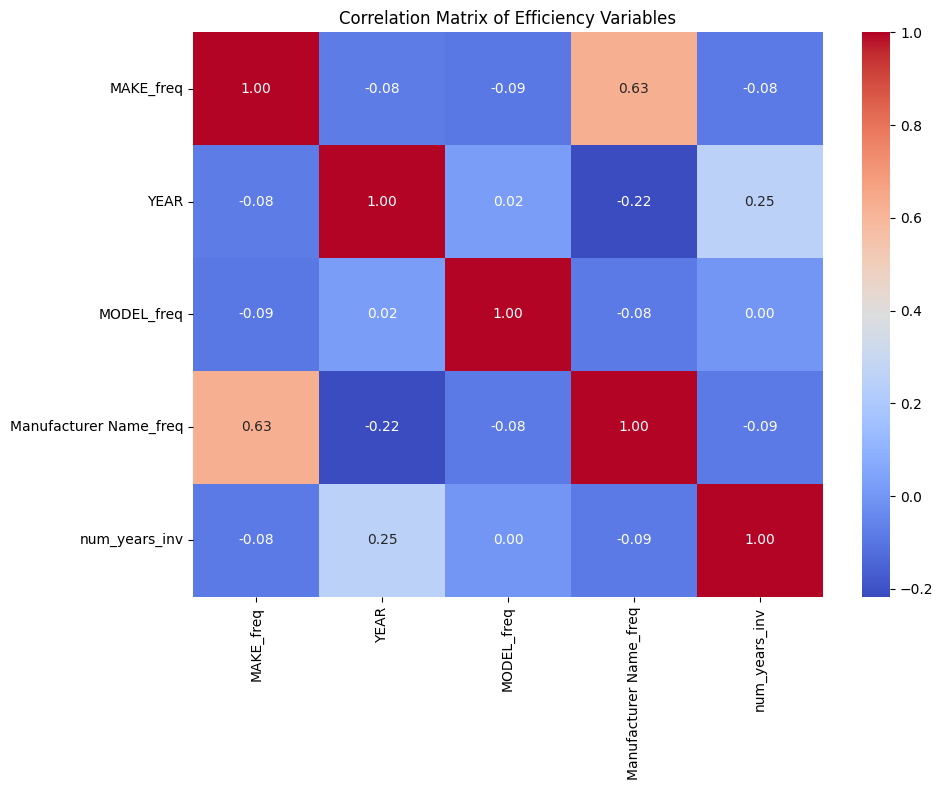

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
efficiency_corr = inv[['MAKE_freq', 'YEAR', 'MODEL_freq','Manufacturer Name_freq','num_years_inv']].corr()

plt.figure(figsize=(10, 8))

# Generating a heatmap with the correlation matrix
sns.heatmap(efficiency_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Efficiency Variables')
plt.tight_layout()

plt.show()

In [ ]:
print(inv.head())

             MAKE    MODEL    YEAR  Manufacturer Name     ODATE  ODATE_Month  \
0   pace american  trailer  2003.0  pace american inc  20080618            6   
4        apexcone  apx9004  2024.0            carfilo  20090326            3   
24       apexcone  apx9005  2024.0            carfilo  20090326            3   
44       apexcone  apx9006  2024.0            carfilo  20090326            3   
64       apexcone  apx9007  2024.0            carfilo  20090326            3   

    ODATE_Year  num_years  num_years_inv  MAKE_freq  MODEL_freq  \
0         2008        5.0            5.0          2           9   
4         2009       15.0           15.0          8           1   
24        2009       15.0           15.0          8           1   
44        2009       15.0           15.0          8           1   
64        2009       15.0           15.0          8           1   

    Manufacturer Name_freq  
0                        2  
4                        8  
24                       8  


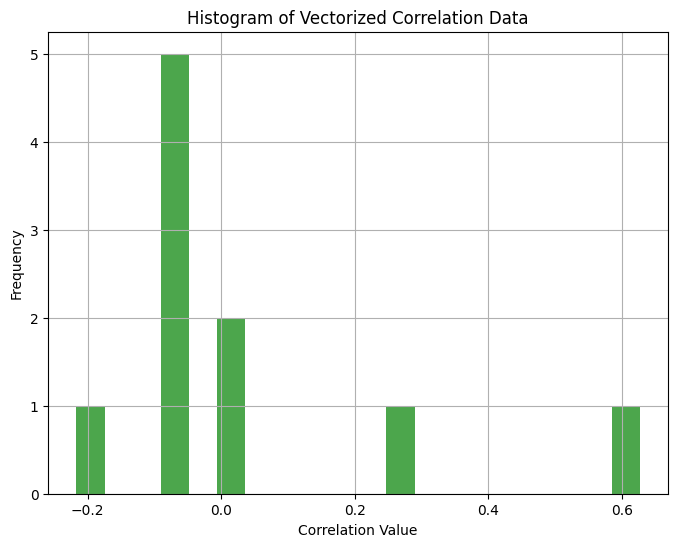

In [ ]:
# Vectorizing the correlation matrix
upper_triangle1 = np.triu(efficiency_corr.values, k=1)  # Extract upper triangle excluding diagonal
correlation_vector1 = upper_triangle1[upper_triangle1 != 0]  # Exclude zeros and diagonal elements

# Plotting histogram of correlation values
plt.figure(figsize=(8, 6))
plt.hist(correlation_vector1, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Vectorized Correlation Data')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This distribution is unusual there might be low varaince in the data. I will check into it.

In [ ]:
# ok need to get the range of the frequency variables used
# getting the ranges of these variables
columns_to_check1 = ['MAKE_freq', 'YEAR', 'MODEL_freq','Manufacturer Name_freq','num_years_inv']

# Calculate the range for each column
range_results1 = {}
for col in columns_to_check1:
    max_value = inv[col].max()
    min_value = inv[col].min()
    range_results1[col] = max_value - min_value

# Convert results to DataFrame for better presentation
range_inv = pd.DataFrame.from_dict(range_results1, orient='index', columns=['Range'])

print(range_inv)

                             Range
MAKE_freq               173.000000
YEAR                     57.000000
MODEL_freq               83.000000
Manufacturer Name_freq  423.000000
num_years_inv            19.916667


In [ ]:
non_numeric_columns = inv.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['MAKE', 'MODEL', 'Manufacturer Name'], dtype='object')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

non_numeric_columns = ['MAKE', 'MODEL', 'Manufacturer Name']
print("Non-numeric columns:", non_numeric_columns)

inv_numeric = pd.get_dummies(inv, columns=non_numeric_columns, drop_first=True)

print("Variance of numeric features:\n", inv_numeric.var())

sns.pairplot(inv_numeric.sample(100))
plt.show()

corr_matrix = inv_numeric.corr()

import numpy as np
corr_values = corr_matrix.values.flatten()

# Plotting histogram of correlation
plt.figure(figsize=(8, 6))
plt.hist(corr_values, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Correlation Values')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.show()


Non-numeric columns: ['MAKE', 'MODEL', 'Manufacturer Name']
Variance of numeric features:
 YEAR                                              1.893094e+02
ODATE                                             1.389369e+10
ODATE_Month                                       1.207148e+01
ODATE_Year                                        1.389794e+02
num_years                                         5.721388e+01
                                                      ...     
Manufacturer Name_yamaha motor corporation usa    4.268066e-03
Manufacturer Name_young industrial ltd            2.520797e-04
Manufacturer Name_yugo america inc                1.007556e-03
Manufacturer Name_zf north america inc            2.520797e-04
Manufacturer Name_zoox inc                        5.040322e-04
Length: 4521, dtype: float64


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

features_defect1 = ['MAKE_freq', 'YEAR', 'MODEL_freq','Manufacturer Name_freq','num_years_inv']

X2, y2 = make_regression(n_samples=1000, n_features=len(features_defect1), noise=0.1, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

meta_model = LinearRegression()

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

stacking_regressor.fit(X_train2, y_train2)

y_pred_stacking = stacking_regressor.predict(X_test2)

mse_stacking = mean_squared_error(y_test2, y_pred_stacking)
r2_stacking = r2_score(y_test2, y_pred_stacking)

print("StackingRegressor:")
print("Mean Squared Error:", mse_stacking)
print("R^2 Score:", r2_stacking)

StackingRegressor:
Mean Squared Error: 114.00978111866895
R^2 Score: 0.9717606100100017


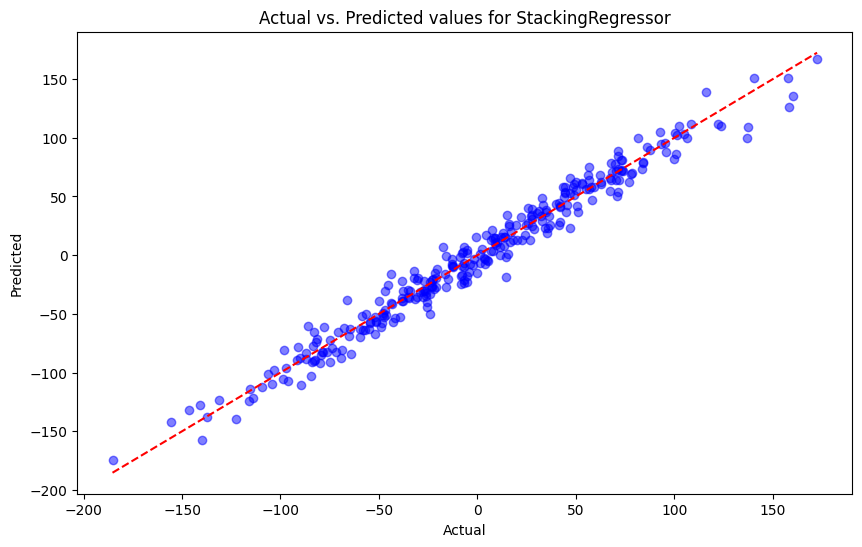

In [ ]:
# visualization of machine learning model
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values for StackingRegressor')
plt.show()

In [ ]:
#inv['MAKE'].fillna(inv['MAKE'].mode()[0], inplace=True)
#inv['MODEL'].fillna(inv['MODEL'].mode()[0], inplace=True)
#inv['YEAR'].fillna(inv['YEAR'].mode()[0], inplace=True)
#inv['MFR_NAME'].fillna(inv['MFR_NAME'].mode()[0], inplace=True)
#inv['ODATE'].fillna(inv['ODATE'].mean[0], inplace=True)

In [ ]:
#nan_values = inv.isna().sum().sort_values(ascending=False)
#nan_values

In [ ]:
#inv['CDATE'].fillna()# add 3 months
#inv['ODATE'].fillna()# remove those if

In [ ]:
## Standardized date formats
#inv['ODATE'] = pd.to_datetime(inv['ODATE'].astype(int).astype(str), format='%Y%m%d')
#inv['CDATE'] = pd.to_datetime(inv['CDATE'].astype(int).astype(str), format='%Y%m%d')

In [ ]:
## Feature engineering by creating new feature and duration of investigation.
#inv['Investigation_Duration'] = (inv['CDATE'] - inv['ODATE']).dt.days

In [ ]:
#inv.info()

In [ ]:
#inv.describe()

In [ ]:
## Scaling and normalizing numerical features and encoding categorical features.
#numerical_features = inv.select_dtypes(include=['float64', 'int64']).columns
#scaler = StandardScaler()
#inv[numerical_features] = scaler.fit_transform(inv[numerical_features])

#categorical_features = inv.select_dtypes(include=['object']).columns
#label_encoders = {}
#for feature in categorical_features:
#    label_encoders[feature] = LabelEncoder()
#    inv[feature] = label_encoders[feature].fit_transform(inv[feature])

#inv.head()

In [ ]:
import pandas as pd
#Complaints Data
columns = [
    "CMPLID",
    "ODINO",
    "MFR_NAME",
    "MAKETXT",
    "MODELTXT",
    "YEARTXT",
    "CRASH",
    "FAILDATE",
    "FIRE",
    "INJURED",
    "DEATHS",
    "COMPDESC",
    "CITY",
    "STATE",
    "VIN",
    "DATEA",
    "LDATE",
    "MILES",
    "OCCURENCES",
    "CDESCR",
    "CMPL_TYPE",
    "POLICE_RPT_YN",
    "PURCH_DT",
    "ORIG_OWNER_YN",
    "ANTI_BRAKES_YN",
    "CRUISE_CONT_YN",
    "NUM_CYLS",
    "DRIVE_TRAIN",
    "FUEL_SYS",
    "FUEL_TYPE",
    "TRANS_TYPE",
    "VEH_SPEED",
    "DOT",
    "TIRE_SIZE",
    "LOC_OF_TIRE",
    "TIRE_FAIL_TYPE",
    "ORIG_EQUIP_YN",
    "MANUF_DT",
    "SEAT_TYPE",
    "RESTRAINT_TYPE",
    "DEALER_NAME",
    "DEALER_TEL",
    "DEALER_CITY",
    "DEALER_STATE",
    "DEALER_ZIP",
    "PROD_TYPE",
    "REPAIRED_YN",
    "MEDICAL_ATTN",
    "VEHICLES_TOWED_YN"
]

Flat_url = 'https://static.nhtsa.gov/odi/ffdd/cmpl/FLAT_CMPL.zip'
data = pd.read_csv(Flat_url, sep="\t", names=columns, on_bad_lines='skip')
data.head()

<ipython-input-4-70d63286f9db>:56: DtypeWarning: Columns (15,16,18,28,32,33,34,35,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(Flat_url, sep="\t", names=columns, on_bad_lines='skip')


,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,...,RESTRAINT_TYPE,DEALER_NAME,DEALER_TEL,DEALER_CITY,DEALER_STATE,DEALER_ZIP,PROD_TYPE,REPAIRED_YN,MEDICAL_ATTN,VEHICLES_TOWED_YN
0,1,958241,"Volvo Car USA, LLC",VOLVO,760,1987.0,N,NaN,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
1,2,958130,Ford Motor Company,FORD,THUNDERBIRD,1992.0,N,19941222.0,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
2,3,958132,"Kia America, Inc.",KIA,SEPHIA,1994.0,Y,19941230.0,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
3,4,958133,"Chrysler (FCA US, LLC)",DODGE,600,1987.0,N,19941231.0,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N
4,5,958137,"Chrysler (FCA US, LLC)",DODGE,CARAVAN,1991.0,N,19941218.0,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,N,N


In [ ]:
data.shape

(1991631, 49)

In [ ]:
columns_to_drop = [
    'CMPLID', 'ODINO', 'VIN', 'DATEA', 'LDATE', 'CITY', 'STATE',
    'DEALER_NAME', 'DEALER_TEL', 'DEALER_CITY', 'DEALER_STATE', 'DEALER_ZIP',
    'POLICE_RPT_YN', 'MEDICAL_ATTN', 'VEHICLES_TOWED_YN', 'PURCH_DT',
    'ORIG_OWNER_YN', 'ANTI_BRAKES_YN', 'CRUISE_CONT_YN', 'NUM_CYLS',
    'DRIVE_TRAIN', 'FUEL_SYS', 'FUEL_TYPE', 'DOT', 'TIRE_SIZE', 'LOC_OF_TIRE',
    'TIRE_FAIL_TYPE', 'ORIG_EQUIP_YN', 'MANUF_DT', 'SEAT_TYPE',
    'RESTRAINT_TYPE', 'REPAIRED_YN']

data = data.drop(columns=columns_to_drop)

data.head()

,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,MILES,OCCURENCES,CDESCR,CMPL_TYPE,TRANS_TYPE,VEH_SPEED,PROD_TYPE
0,"Volvo Car USA, LLC",VOLVO,760,1987.0,N,NaN,N,0,0,ENGINE AND ENGINE COOLING:COOLING SYSTEM:RADIA...,NaN,NaN,RADIATOR FAILED @ HIGHWAY SPEED OBSTRUCTING DR...,EVOQ,NaN,NaN,V
1,Ford Motor Company,FORD,THUNDERBIRD,1992.0,N,19941222.0,N,0,0,"FUEL SYSTEM, GASOLINE:DELIVERY",NaN,1.0,"FUEL LEAKED FROM FUEL TANK AREA, EMITTING STRO...",EVOQ,NaN,NaN,V
2,"Kia America, Inc.",KIA,SEPHIA,1994.0,Y,19941230.0,N,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION,NaN,NaN,SHIFTED INTO REVERSE VEHICLE JERKED VIOLENTLY....,EVOQ,NaN,NaN,V
3,"Chrysler (FCA US, LLC)",DODGE,600,1987.0,N,19941231.0,N,0,0,"FUEL SYSTEM, GASOLINE:STORAGE:TANK ASSEMBLY",NaN,NaN,FUEL TANK ; LEAKS BECAUSE OF RUST GAS LEAK BY ...,EVOQ,NaN,NaN,V
4,"Chrysler (FCA US, LLC)",DODGE,CARAVAN,1991.0,N,19941218.0,N,0,0,SEATS,NaN,1.0,"DRIVER SIDE SEAT FRAME BROKE IN TWO, CAUSING S...",EVOQ,NaN,NaN,V


In [ ]:
count_nans2 = data.isna().sum()
with_most_nans3 = count_nans2.sort_values(ascending=False)
print(with_most_nans3)

data.dropna(inplace=True)

TRANS_TYPE    1660888
OCCURENCES    1019533
VEH_SPEED      942641
MILES          904288
FAILDATE       110120
COMPDESC          149
CDESCR             74
MODELTXT           27
MFR_NAME           25
YEARTXT            25
MAKETXT            25
PROD_TYPE          21
INJURED             0
CMPL_TYPE           0
FIRE                0
CRASH               0
DEATHS              0
dtype: int64


In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [ ]:
count_nans2 = data.isna().sum()
with_most_nans3 = count_nans2.sort_values(ascending=False)
print(with_most_nans3)

MFR_NAME      0
COMPDESC      0
VEH_SPEED     0
TRANS_TYPE    0
CMPL_TYPE     0
CDESCR        0
OCCURENCES    0
MILES         0
DEATHS        0
MAKETXT       0
INJURED       0
FIRE          0
FAILDATE      0
CRASH         0
YEARTXT       0
MODELTXT      0
PROD_TYPE     0
dtype: int64


In [ ]:
data.count()

MFR_NAME      106045
MAKETXT       106045
MODELTXT      106045
YEARTXT       106045
CRASH         106045
FAILDATE      106045
FIRE          106045
INJURED       106045
DEATHS        106045
COMPDESC      106045
MILES         106045
OCCURENCES    106045
CDESCR        106045
CMPL_TYPE     106045
TRANS_TYPE    106045
VEH_SPEED     106045
PROD_TYPE     106045
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106045 entries, 6237 to 1740284
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   MFR_NAME    106045 non-null  object 
 1   MAKETXT     106045 non-null  object 
 2   MODELTXT    106045 non-null  object 
 3   YEARTXT     106045 non-null  float64
 4   CRASH       106045 non-null  object 
 5   FAILDATE    106045 non-null  float64
 6   FIRE        106045 non-null  object 
 7   INJURED     106045 non-null  int64  
 8   DEATHS      106045 non-null  int64  
 9   COMPDESC    106045 non-null  object 
 10  MILES       106045 non-null  float64
 11  OCCURENCES  106045 non-null  object 
 12  CDESCR      106045 non-null  object 
 13  CMPL_TYPE   106045 non-null  object 
 14  TRANS_TYPE  106045 non-null  object 
 15  VEH_SPEED   106045 non-null  float64
 16  PROD_TYPE   106045 non-null  object 
dtypes: float64(4), int64(2), object(11)
memory usage: 14.6+ MB


In [ ]:
data = data.rename(columns={'MAKETXT' : 'Make', 'MODELTXT': 'Model', 'YEARTXT': 'Year'})

In [ ]:
import numpy as np

# Replace all years above 2024 with 2024
data.loc[data['Year'] > 2024, 'Year'] = 2024

data['FAILDATE'] = data['FAILDATE'].astype(float).astype(int)
# Convert 'ODATE' to integer
data['FAILDATE_Month'] = (data['FAILDATE'] % 10000) // 100
data['FAILDATE_Year'] = data['FAILDATE'] // 10000
data['num_years_compl'] = data['FAILDATE_Year'] - data['Year']

data['num_years_compl'] = data['num_years_compl'].abs()

# for all the zero values we need to create a percentage of the year it was travelled
# by the month/12 * random integer of max or min annual miles for odometer. We will assume
# January is always a buy time of the vehicle and calculate the month as percentage of the year-
# 42994 vehicles with zero on the year so it won't cause a significant bias in the outcome.

# Calculate percentage of the year traveled for zero values in 'num_years' column
data.loc[data['num_years_compl'] == 0, 'num_years_compl'] = data.loc[data['num_years_compl'] == 0, 'FAILDATE_Month'] / 12

data.tail()

,MFR_NAME,Make,Model,Year,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,MILES,OCCURENCES,CDESCR,CMPL_TYPE,TRANS_TYPE,VEH_SPEED,PROD_TYPE,FAILDATE_Month,FAILDATE_Year,num_years_compl
1729413,Toyota Motor Corporation,TOYOTA,RAV4,2016.0,N,20200528,Y,0,0,ELECTRICAL SYSTEM,44156.0,1.0,TL* THE CONTACT OWNED A 2016 TOYOTA RAV4. WHIL...,EVOQ,AUTO,30.0,V,5,2020,4.0
1729684,"General Motors, LLC",CHEVROLET,CAMARO,2015.0,N,20210224,N,0,0,ENGINE,21000.0,1.0,TL* THE CONTACT OWNS A 2015 CHEVROLET CAMARO. ...,EVOQ,AUTO,30.0,V,2,2021,6.0
1730056,"Nissan North America, Inc.",NISSAN,VERSA,2017.0,Y,20210129,N,1,0,AIR BAGS,60000.0,1.0,TL* THE CONTACT OWNED A 2017 NISSAN VERSA. THE...,EVOQ,AUTO,40.0,V,1,2021,4.0
1732701,"General Motors, LLC",CHEVROLET,CORVETTE,2019.0,N,20210221,N,0,0,WHEELS,2200.0,1.0,TL* THE CONTACT OWNS A 2019 CHEVROLET CORVETTE...,EVOQ,AUTO,45.0,V,2,2021,2.0
1740284,"General Motors, LLC",CHEVROLET,SILVERADO 1500,2008.0,N,20210416,N,0,0,AIR BAGS,0.0,1.0,TL* TAKATA RECALL. THE CONTACT OWNS A 2008 CHE...,EVOQ,AUTO,0.0,V,4,2021,13.0


In [ ]:
data.shape

(106045, 20)

In [ ]:
data.head()

,MFR_NAME,Make,Model,Year,CRASH,FAILDATE,FIRE,INJURED,DEATHS,COMPDESC,MILES,OCCURENCES,CDESCR,CMPL_TYPE,TRANS_TYPE,VEH_SPEED,PROD_TYPE,FAILDATE_Month,FAILDATE_Year,num_years_compl
6237,"Chrysler (FCA US, LLC)",DODGE,CARAVAN,1994.0,N,19950201,N,0,0,EQUIPMENT ADAPTIVE/MOBILITY,3000.0,4.0,WHILE DRIVING THE REAR HATCHBACK LIFTGATE COME...,EVOQ,AUTO,55.0,V,2,1995,1.00
145116,Ford Motor Company,LINCOLN,TOWN CAR,1999.0,Y,19990327,N,1,0,AIR BAGS:FRONTAL,4000.0,1.0,THE CONSUMER WAS INVOLVED IN AN ACCIDENT AND T...,EVOQ,AUTO,55.0,V,3,1999,0.25
182271,"Chrysler (FCA US, LLC)",DODGE,DURANGO,1998.0,Y,19991026,N,0,0,"SERVICE BRAKES, HYDRAULIC:ANTILOCK/TRACTION CO...",65000.0,0.0,WHILE DRIVING IN ONE LANE AND APPROACHING A ST...,EVOQ,AUTO,12.0,V,10,1999,1.00
286603,"General Motors, LLC",OLDSMOBILE,AURORA,1995.0,N,20010322,Y,0,0,ELECTRICAL SYSTEM:WIRING:FRONT UNDERHOOD,80000.0,1.0,WHILE DRIVING VEHICLE CAUGHT ON FIRE UNDER H...,EVOQ,AUTO,5.0,V,3,2001,6.00
321486,"Mitsubishi Motors North America, Inc.",MITSUBISHI,MIRAGE,1996.0,Y,20011103,N,1,0,AIR BAGS:FRONTAL,83.0,2.0,CONSUMER'S VEHICLE WAS INVOLVED IN A FRONT END...,EVOQ,MAN,45.0,V,11,2001,5.00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

In [ ]:
text_columns_data = ['Make','Model','MFR_NAME', 'COMPDESC', 'CDESCR']
for col in text_columns_data:
    data[col] = data[col].apply(preprocess_text)

# Identify and remove duplicates
data.drop_duplicates(subset=text_columns_data, inplace=True)

# Create frequency features for each text column
for col in text_columns_data:
    data[col + '_freq'] = data.groupby(col)[col].transform('count')

NameError: name 'data' is not defined

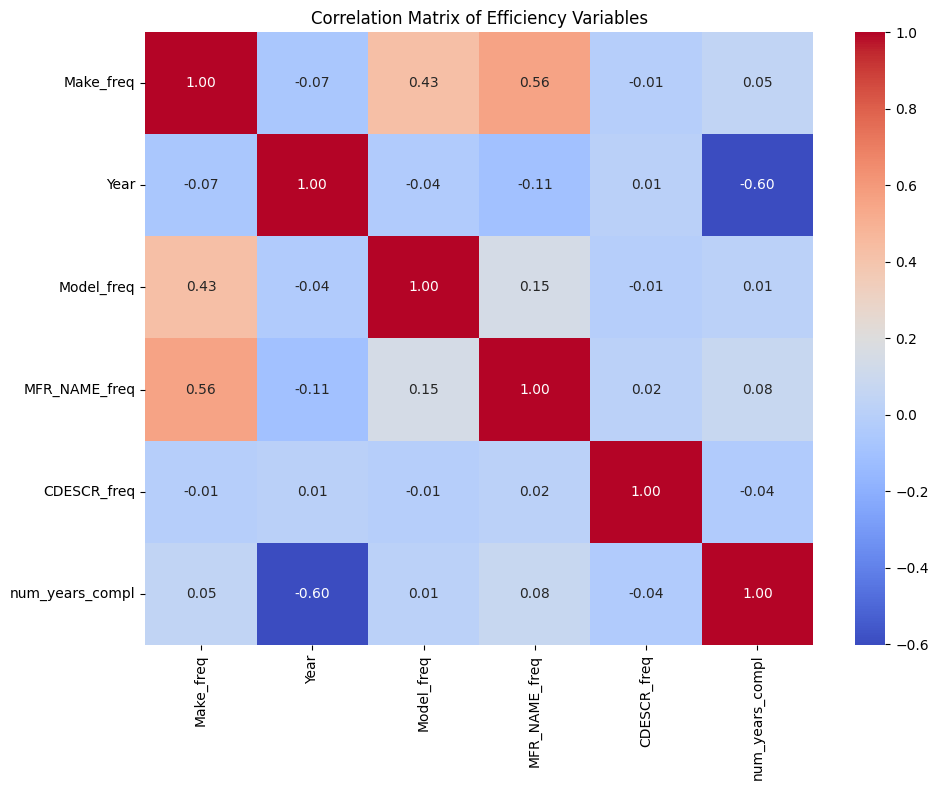

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
safety_corr = data[['Make_freq', 'Year', 'Model_freq','MFR_NAME_freq','CDESCR_freq','num_years_compl']].corr()

plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(safety_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Efficiency Variables')
plt.tight_layout()

plt.show()

In [ ]:
print(data.columns)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data_sampled = data.sample(n=500, random_state=42)

efficiency_corr = data_sampled[['Year', 'FAILDATE', 'INJURED', 'DEATHS', 'MILES', 'VEH_SPEED', 'FAILDATE_Month', 'FAILDATE_Year', 'num_years', 'Odometer']]

plt.figure(figsize=(10, 8))

# Generating a heatmap
sns.heatmap(efficiency_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Efficiency Variables')
plt.tight_layout()

plt.show()

In [ ]:
#workig on this
#from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = data.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_sampled = data.sample(n=1000, random_state=42)

efficiency_corr = data_sampled[['Year', 'FAILDATE', 'INJURED', 'DEATHS', 'MILES', 'VEH_SPEED', 'FAILDATE_Month', 'FAILDATE_Year', 'num_years', 'Odometer']]

upper_triangle = np.triu(efficiency_corr.values, k=1)
correlation_vector = upper_triangle[upper_triangle != 0]

plt.figure(figsize=(8, 6))
plt.hist(correlation_vector, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Vectorized Correlation Data')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#random Forest model with complaints since our target is Odometer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt

features_defect = ['Year', 'FAILDATE', 'INJURED', 'DEATHS', 'MILES', 'VEH_SPEED', 'FAILDATE_Month', 'FAILDATE_Year', 'num_years']  # Add or adjust based on visual inspection
target_defect = 'Odometer'

X_d = data[features_defect]
y_d = data[target_defect]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_d, y_d, test_size=0.3, random_state=42)

rf_model_defect = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_defect.fit(X_train1, y_train1)

y_pred1 = rf_model_defect.predict(X_test1)

print("Mean Squared Error:", mean_squared_error(y_test1, y_pred1))
print("R^2 Score:", r2_score(y_test1, y_pred1))

tree_to_visualize = rf_model_defect.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=features_defect, filled=True)
plt.show()

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X2, y2 = make_regression(n_samples=1000, n_features=len(features_defect1), noise=0.1, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

meta_model = LinearRegression()

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

stacking_regressor.fit(X_train2, y_train2)

y_pred_stacking = stacking_regressor.predict(X_test2)

mse_stacking = mean_squared_error(y_test2, y_pred_stacking)
r2_stacking = r2_score(y_test2, y_pred_stacking)

print("StackingRegressor:")
print("Mean Squared Error:", mse_stacking)
print("R^2 Score:", r2_stacking)